**Predmet:** Principi prezentacije i prepoznavanja oblika

**Student:** Jovana Tanacković IT35/2019

**UVOD**

> Tema projekta je segmentacija grupe nerva pod nazivom plexus brachialis. Ova grupa zadužena je za pokretanje ramenog pojasa i šaka, kao i za prenošenje senzornih nadražaja.



> Za izradu projekta isti će biti posmatran sa teorijskog i praktičnog aspekta u cilju realizacije na najbolji mogući način.


**SEGMENTACIJA**


> Segmentacija predstavlja proces podele slika na više segmenata tj. regiona i dodavanje labele svakom od njih. Jedan je od najvažnijih zadataka kompjuterske vizije.

> Vrste segmentacije slika su: 

*   semantička segmentacija - izdvaja region i ceo objekat 
*   segmentacija instance - pronalazi ivice objekta i označava svaki od njih posebno[1].


> Na narednim slikama nalazi se primer semantičke i segmentacije instance, respektivno.
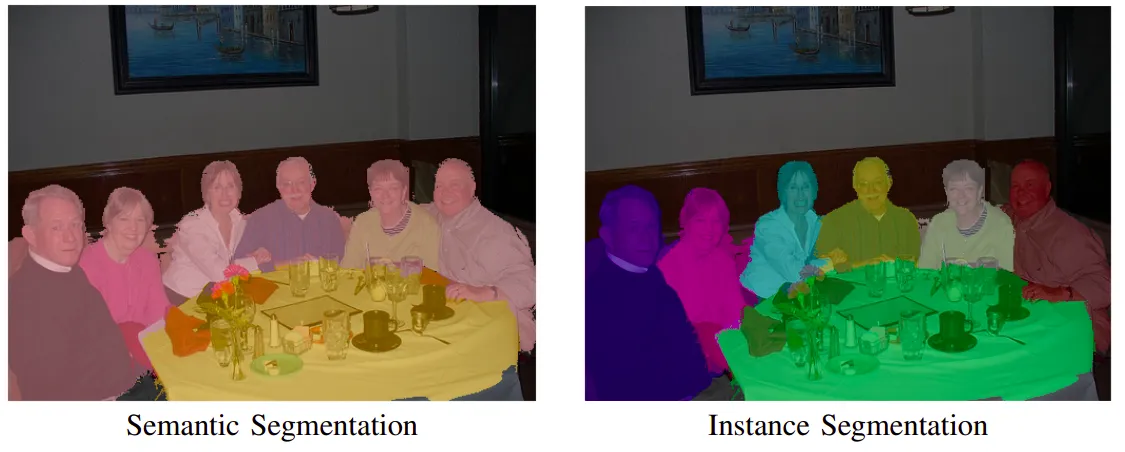


**SET PODATAKA**

> Dati set podataka sadrži dva foldera koji se koriste za treniranje i testiranje modela. *Train* folder sadrži pored slika ultrazvuka i maske sa identifikovanim nervom. Model koji će se koristiti je U-Net konvulcijska mreža koja se može posmatrati kao mreža enkodera koju prati mreža dekodera[1].

**ZAKLJUČAK**

> Cilj izrade projekta je razumevanje koncepta segmentacije kao jednog od često korišćenih udubokom učenju. 

> Prilikom izrade došlo je do boljeg razumevanja konvulcionih mreža i načina na koji one funkcionišu, kao i do boljeg razumevanja seta podataka. U budućnosti postoji prostor za napredak potencijalno korišćenjem nekog drugog modela.



**REFERENCE**

> [1] Maynard-Reid, M. (2023) U-Net image segmentation in Keras, PyImageSearch. Available at: https://pyimagesearch.com/2022/02/21/u-net-image-segmentation-in-keras/ (Accessed: 12 June 2023). 








In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?id=1PRazw6hFwo1qKXqb4RQYwtQL-c83XUja&export=download' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo" -O dataset.zip && rm -rf /tmp/cookies.txt


--2023-06-13 02:04:18--  https://docs.google.com/uc?export=download&confirm=t&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo
Resolving docs.google.com (docs.google.com)... 142.251.10.138, 142.251.10.139, 142.251.10.113, ...
Connecting to docs.google.com (docs.google.com)|142.251.10.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmi9p3suqbmpseq5flooruvp0v3qtps3/1686621825000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=78e1cc9b-4395-48f9-a5d8-1f28c85ed0c7 [following]
--2023-06-13 02:04:19--  https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mmi9p3suqbmpseq5flooruvp0v3qtps3/1686621825000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=78e1cc9b-4395-48f9-a5d8-1f28c85ed0c7
Resolving doc-0g-3c-docs.googleusercontent.com (doc-0g-3c-docs.googleusercontent.com)... 142.251.12.132, 

In [2]:
!unzip dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

Nakon učitanih potrebnih podataka, sada je na redu da se učitaju i potrebne biblioteke.

PyTorch- razvijen od strane Meta AI, predstavlja jedan od najboljih frameworka za duboko učenje i kopjutersku viziju.

In [3]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-nq1a58fq
  Running command git clone --filter=blob:none --quiet https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-nq1a58fq
  Resolved https://github.com/qubvel/segmentation_models.pytorch to commit e5d3db20e9c2ddb76f88642409e527239943c983
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.8 MB/s eta 0:00:00
  Created wheel f

Nakon dodatih biblioteka, dodajemo potrebne module za manipulaciju podacima, vizualizaciju i kreiranje neuronskih mreža(konkretno torch moduli), podrška za GPU i tako dalje.

In [4]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

In [5]:
train_masks = pd.read_csv("train_masks.csv")

In [6]:
train_masks.head(10)

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN
5,1,6,NaN
6,1,7,172767 15 173175 29 173591 34 173993 7 174004 ...
7,1,8,NaN
8,1,9,NaN
9,1,10,NaN


Sada ćemo proveriti osnovne informacije o ovom fajlu, npr. koliko not-null, odnosno koliko null vrednosti ima.

In [7]:
train_masks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


In [8]:
train_masks.isna().sum()

subject       0
img           0
pixels     3312
dtype: int64

Slike koje nemaju masku nemaju ni nerve detektovane na njima, sada zbrajamo koliko slika ima masku a koliko nema kako bismo videli odnos tih vrednosti.

In [9]:
nerve = (train_masks['pixels'][train_masks['pixels']!= 'NaN'].count())
no_nerve = (train_masks['img'].count() - nerve)

print('Nerves detected', nerve )
print('No nerves detected', no_nerve)

Nerves detected 2323
No nerves detected 3312


Text(0, 0.5, 'Number')

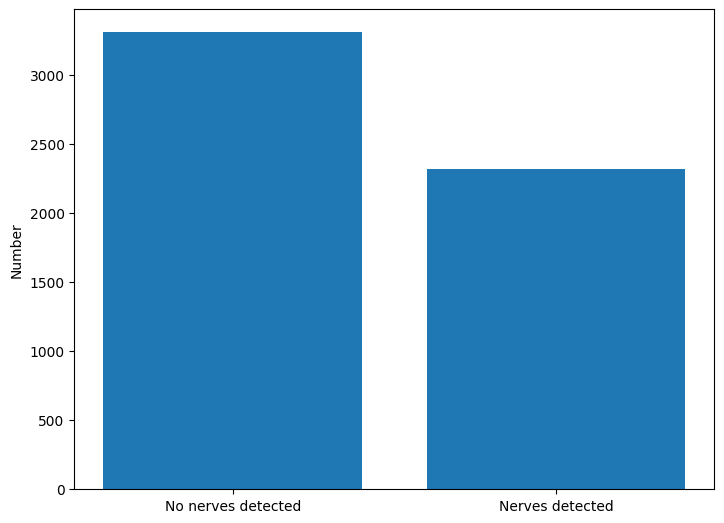

In [10]:
plot = plt.figure()
axs = plot.add_axes([0,0,1,1])
x = ['No nerves detected', 'Nerves detected']
labels = [no_nerve, nerve]
axs.bar(x, labels)
plt.ylabel("Number")

Na prethodnom histogramu vizuelno je prikazana razlika između slika sa nervima i slika bez njih. 

Za praćenje validation loss-a koji nam je potreban predstavićemo još par biblioteka, Early stopping i pickle.

Early stopping nam služi da prekine proces učenja modela kada se rezultati ne poboljšavaju znatno, ovde će pratiti validation loss

Pickle nam služi da implementira binarne protokole za serijalizaciju i deserijalizaciju objekata, prvo serijalizuje objekat pa ga tek onda upiše u datoteku. 

In [11]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git es

Cloning into 'es'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), 533.87 KiB | 9.05 MiB/s, done.


In [12]:
from es.pytorchtools import EarlyStopping

In [13]:
def checkpoint(self, val_loss, model):
    import pickle       
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f) 
    self.val_loss_min = val_loss

In [14]:
EarlyStopping.save_checkpoint = checkpoint

Sada kreiramo razdvojene putanje za testiranje i treiranje za lakšu manipulaciju prilikom pozivanja.

In [15]:
train_path = 'train'
test_path = 'test'

train_csv = 'train_annotation.csv'

In [16]:
from PIL import Image

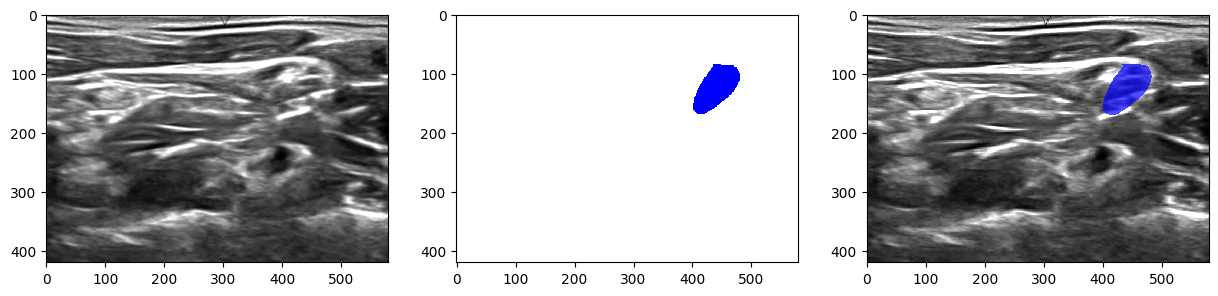

In [17]:
img = np.array(Image.open("train/"+"1_1.tif"))
img_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
img_mask = np.ma.masked_where(img_mask == 0, img_mask)

fig, ax = plt.subplots(1, 3, figsize = (15, 15))
ax[0].imshow(img, cmap = "gray")

ax[1].imshow(img_mask, cmap = "winter")

ax[2].imshow(img, cmap = "gray", interpolation = "none")
ax[2].imshow(img_mask, cmap = "winter", interpolation = "none", alpha = 0.7)

Sada smo isčitali prvu sliku iz train seta i njenu masku, zatim smo na trećoj slici prikazali gde je detektovan nerv. Sada se na vizuelnom primeru jasnije razume set podataka. U sledećem koraku ćemo u csv fajlu zapisivati slike i njihove odgovarajuće maske.

In [18]:
def csv(data_path, out_csv_path, key_word='mask'):
    to_delete = f'_{key_word}'

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(to_delete, '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)
                
            if not os.path.exists(out_csv_path):
                data.to_csv(out_csv_path, header=True, index=False)
            else:
                data.to_csv(out_csv_path, mode='a', header=False, index=False)

In [19]:
csv(data_path=train_path, out_csv_path=train_csv)

Sada kreiramo set podataka za sam model gde smeštamo učitane slike i odgovarajuće maske.

In [20]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
       
        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))  
    
        if self.transform:
            return self.transform(image), self.transform(mask)
    
        return image, mask

In [21]:
train_df = pd.read_csv(train_csv)

In [22]:
train_df.head(10) 

,mask,img
0,46_114_mask.tif,46_114.tif
1,28_96_mask.tif,28_96.tif
2,45_50_mask.tif,45_50.tif
3,1_85_mask.tif,1_85.tif
4,33_68_mask.tif,33_68.tif
5,32_52_mask.tif,32_52.tif
6,25_112_mask.tif,25_112.tif
7,6_114_mask.tif,6_114.tif
8,19_25_mask.tif,19_25.tif
9,37_53_mask.tif,37_53.tif


Učitavamo prvih deset kodom iznad.

In [23]:
samples_train = ImageDataset(df=train_df, root_dir=train_path)

Sada vizuelno prikazujemo par primera slika i maski koji su kreirani u prethodnim koracima.

In [24]:
def samples_display(data, n_col, n_row):
    fig = plt.figure(figsize=(20, 5))
        
    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)
        
        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")
        
    fig.show()

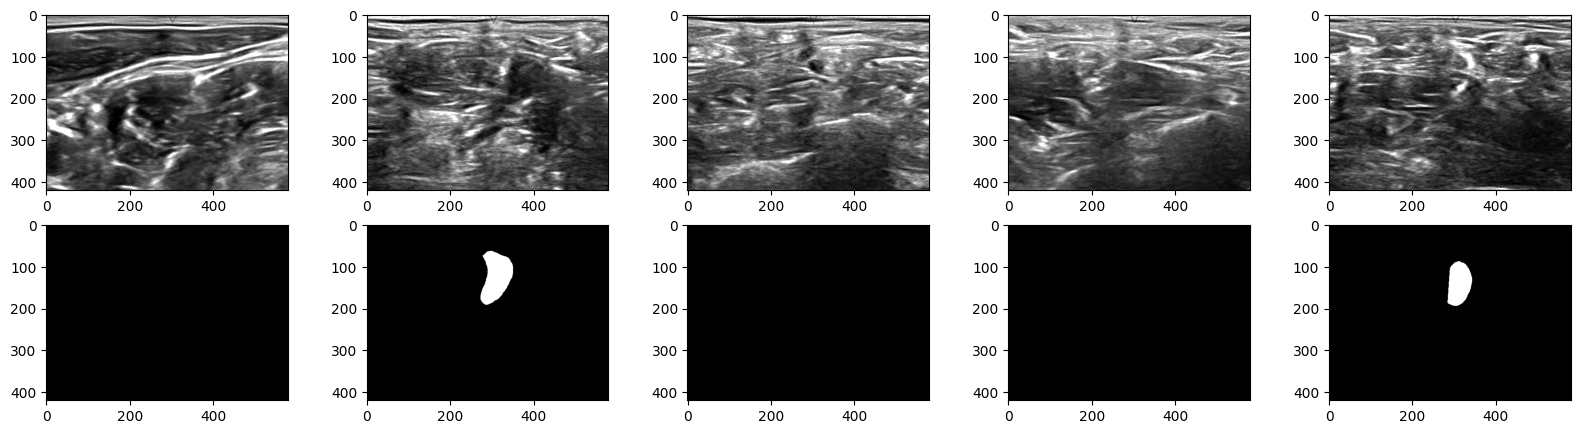

In [30]:
samples_display(data=samples_train, n_col = 5, n_row = 2)

Ovde vidimo da na 5 fotografija isčitanih, na 2 od njih se detektuje nerv, dalje nastavljamo na pravljenje modela.

In [25]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Sada se kreira UNet konvulciona mreža uz pomoć prethodno definisanih delova iz segmentation_model_pytorch.

In [26]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth
100%|██████████| 507M/507M [00:06<00:00, 80.7MB/s]


**METRIKA-IOU**

Intersction over Union koristi se da bi se proverila tačnost detekcije. Ovde ćemo proveravati presek između predikcije i maske. Najbolji rezultat bi bio da je vrednost metrike približna 1 jer bi to značilo da je model dobar.

In [27]:
import segmentation_models_pytorch.utils as smpu

In [28]:
loss = smpu.losses.DiceLoss()
metrics = [smpu.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

In [29]:
def split_df(df, fraction=0.8):  
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

In [30]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [31]:
def train(model, train_df, train_dir, optimizer, loss, metrics, 
          learning_rate=0.01, batch_size=15, epochs=20, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):   
    
    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma) 

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )
    
    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    ) 
    
    train_logs, valid_logs = [], []
    
    for epoch in range(epochs):   
        train_dataframe, val_dataframe = split_df(train_df) 
          
        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=True)    

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=False)        

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)
        
        train_logs.append(train_log)
        valid_logs.append(valid_log)
   
        early_stopping(valid_log[loss.__name__], model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

In [32]:
res = train(model=model,
            train_df=train_df, 
            train_dir=train_path, 
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=15,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE, 
            transform=my_transforms)


Epoch: 1/20
valid: 100%|██████████| 301/301 [01:01<00:00,  4.90it/s, dice_loss - 0.4541, iou_score - 0.3824]
Validation loss decreased (inf --> 0.454090).  Saving model...

Epoch: 2/20
valid: 100%|██████████| 301/301 [01:02<00:00,  4.80it/s, dice_loss - 0.4194, iou_score - 0.4165]
Validation loss decreased (0.454090 --> 0.419366).  Saving model...

Epoch: 3/20
valid: 100%|██████████| 301/301 [01:02<00:00,  4.82it/s, dice_loss - 0.4824, iou_score - 0.3559]
EarlyStopping counter: 1 out of 3

Epoch: 4/20
valid: 100%|██████████| 301/301 [01:01<00:00,  4.87it/s, dice_loss - 0.5052, iou_score - 0.3349]
EarlyStopping counter: 2 out of 3

Epoch: 5/20
valid: 100%|██████████| 301/301 [01:02<00:00,  4.83it/s, dice_loss - 0.3931, iou_score - 0.4459]
Validation loss decreased (0.419366 --> 0.393067).  Saving model...

Epoch: 6/20
valid: 100%|██████████| 301/301 [01:02<00:00,  4.81it/s, dice_loss - 0.3832, iou_score - 0.4554]
Validation loss decreased (0.393067 --> 0.383151).  Saving model...

Epoc

In [33]:
import pickle

In [34]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [35]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [36]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [37]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['y', 'c'], 
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()
    
    fig.show() 

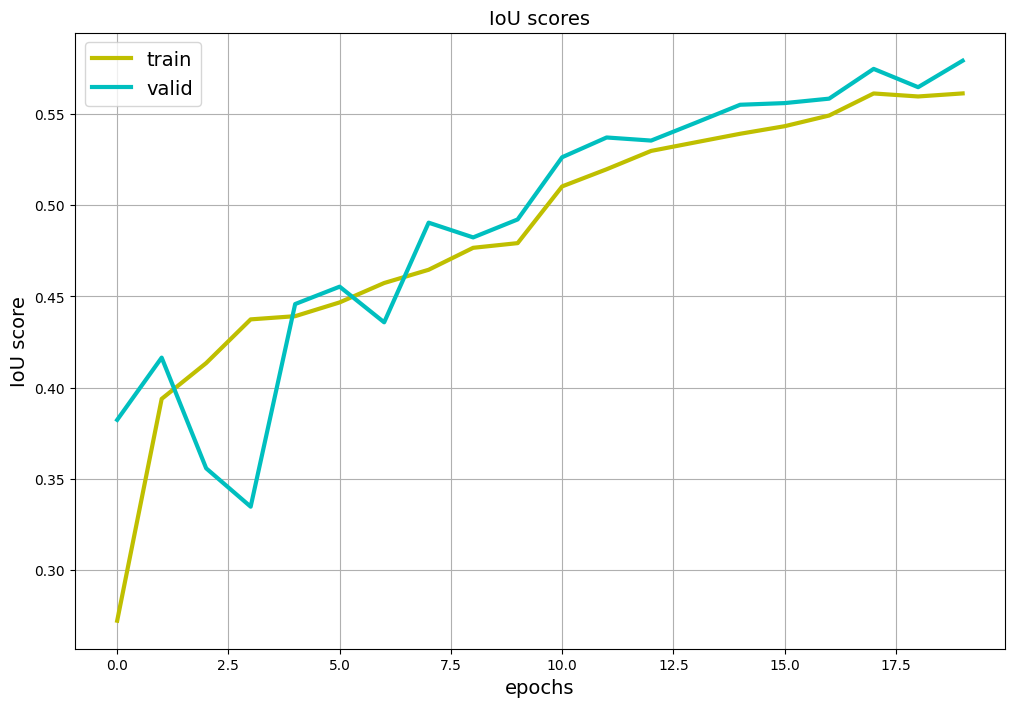

In [38]:
draw_graphic(df_dict=res_dict, title='IoU scores', criteria='iou_score', xlab='epochs', ylab='IoU score')

Većim delom trening i validacija su približnih vrednosti, naročito pri kraju.

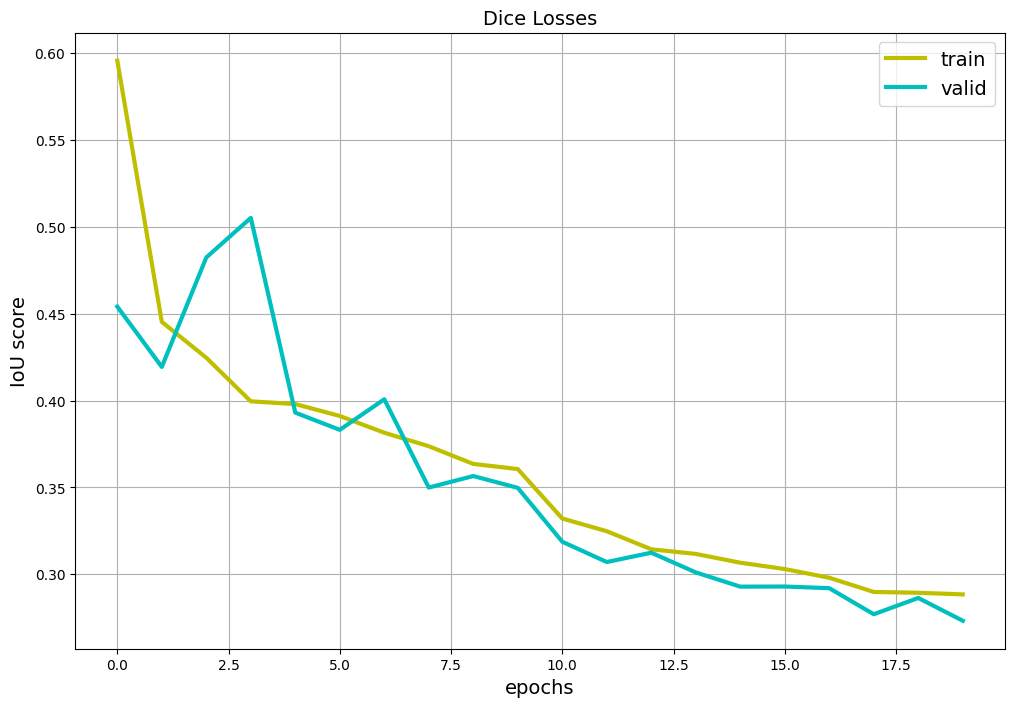

In [39]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

Rad nad testnim podacima sledi.

In [40]:
from tqdm.notebook import tqdm

In [41]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [42]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

In [43]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()
    
    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [44]:
create_csv_submission(model=model, 
                      data_path=test_path, 
                      img_list=imgs,
                      out_path='submission.csv')

  0%|          | 0/5508 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to

In [45]:
test_sub = pd.read_csv("submission.csv")

In [46]:
test_sub.head(20)

,img,pixels
0,1,121057 1 121477 1 121897 1 122317 3 122737 3 1...
1,2,108540 40 108960 40 109376 60 109795 61 110214...
2,3,NaN
3,4,NaN
4,5,107270 9 107690 9 108109 12 108524 61 108944 6...
5,6,NaN
6,7,NaN
7,8,NaN
8,9,101407 5 101812 33 102232 33 102652 35 103069 ...
9,10,135361 11 135781 11 136200 12 136620 12 137039...
